In [2]:
#Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE 
from sklearn.model_selection import GridSearchCV
from sklearn import decomposition, datasets
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import classification_report

In [3]:
#read training dataset
train = pd.read_csv('https://raw.githubusercontent.com/16ejjmm/processed-data-/main/Final_Train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/16ejjmm/processed-data-/main/Final_Test.csv')
Data = pd.get_dummies(train)
X = Data.loc[:, Data.columns != 'PotentialFraud']
y = Data['PotentialFraud']
X_holdout = pd.get_dummies(test)
X.head(5)


,Unnamed: 0,InscClaimAmtReimbursed,DeductibleAmtPaid,Hospitalization_Duration,Claim_Period,ExtraClaimDays,Inpatient_or_Outpatient,RenalDiseaseIndicator,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,Provider_PRV57754,Provider_PRV57755,Provider_PRV57756,Provider_PRV57757,Provider_PRV57758,Provider_PRV57759,Provider_PRV57760,Provider_PRV57761,Provider_PRV57762,Provider_PRV57763
0,0,104640,5340.0,30.0,61,0.0,5,8,300,300,...,0,0,0,0,0,0,0,0,0,0
1,1,605670,66286.0,382.0,617,0.0,62,29,1560,1567,...,0,0,0,0,0,0,0,0,0,0
2,2,52170,310.0,0.0,362,0.0,0,23,1768,1782,...,0,0,0,0,0,0,0,0,0,0
3,3,280910,3700.0,0.0,2433,0.0,0,259,13872,13910,...,0,0,0,0,0,0,0,0,0,0
4,4,33710,3264.0,19.0,141,0.0,3,11,852,852,...,0,0,0,0,0,0,0,0,0,0


In [4]:
#Implementing SMOTE
# transform the dataset
sm = SMOTE(random_state=1)
X_sm, y_sm = sm.fit_resample(X, y)

print('\nBalance of positive and negative classes (%):')
y_sm.value_counts(normalize=True) * 100


Balance of positive and negative classes (%):


0    50.0
1    50.0
Name: PotentialFraud, dtype: float64

In [5]:
#Instantiate Classifier Model 
dt = DecisionTreeClassifier(criterion='entropy', max_depth= 6, min_samples_split= 2, random_state=1)

In [6]:
bc = BaggingClassifier(base_estimator = dt, n_estimators=400, n_jobs=-1, bootstrap=True, oob_score=True)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=1)

In [8]:
#fit model 
bc.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                        max_depth=6,
                                                        random_state=1),
                  n_estimators=400, n_jobs=-1, oob_score=True)

In [9]:
# testing model
y_pred = bc.predict(X_test)

In [10]:
#Accuracy_Score 
accuracy_score(y_test, y_pred)

0.8970438328236493

In [24]:
#confusion Matrix
cf = confusion_matrix(y_test, y_pred)

In [12]:
#F1_score
f1_score(y_test, y_pred)

0.8999008919722497

In [13]:
#percision Score
precision_score(y_test, y_pred)

0.86558627264061

In [14]:
recall_score(y_test, y_pred)

0.9370485036119711

In [15]:
roc_auc_score(y_test, y_pred)

0.8975272729540218

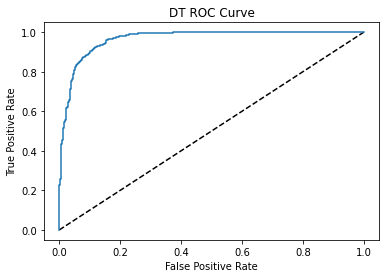

0.8975272729540218


In [16]:
# AUC Curve 
dt_pred_prob = bc.predict_proba(X_test)[:,1]
bc_fpr, bc_tpr, bc_thresholds = roc_curve(y_test, dt_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(bc_fpr, bc_tpr, label='Decision Tree')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('DT ROC Curve')
bc_auc = roc_auc_score(y_test, y_pred)
plt.show()
print(bc_auc)

In [17]:
#OOB Score
bc.oob_score_

0.911802192199847

In [18]:
#classification report
rep = classification_report(y_test, y_pred)
print(rep)

              precision    recall  f1-score   support

           0       0.93      0.86      0.89       993
           1       0.87      0.94      0.90       969

    accuracy                           0.90      1962
   macro avg       0.90      0.90      0.90      1962
weighted avg       0.90      0.90      0.90      1962



In [30]:
print("final predicted outputs given testing set:", y_pred)

print("number of claims predicted as fraud", sum(y_pred == 1))
print("Number of claims predicted as not fraud: ", sum(y_pred == 0))
wip = sum(cf)
print("total number of claims: ", sum(wip))

final predicted outputs given testing set: [1 1 1 ... 1 0 1]
number of claims predicted as fraud 1049
Number of claims predicted as not fraud:  913
total number of claims:  1962
